<a href="https://colab.research.google.com/github/suryansh-raghuvanshi-data/ML_From_Scratch/blob/main/Linear_regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

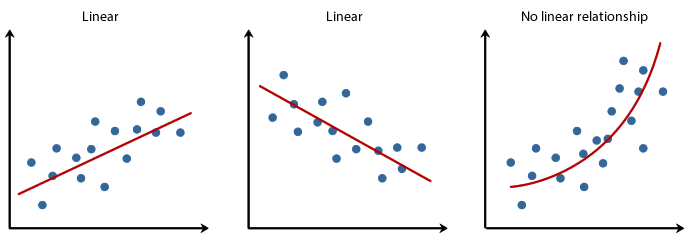

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

There are 4 steps to find the equation for best fit line in Linear Regression(Univariate):

1) Hypothesis Funtion: We need to define the hypothesis wrt the predicition i.e. which model will best predicit the result. In this case we assume it is univariate linear regression model. Y= W0 + W1X

2) Cost Function: We need to define the cost function and find the error for our the best fit line.

3) Gradient: We need to differentiation the error function to find the minima i.e. the value of W0 and W1 where error will be minimum. Since we don't have any differentiation function, we will be manually calculating the differentiation each time and using it to find the change in cost function.

4) Gradient Descent: Once we know the change in the cost function wrt weights i.e. gradient, we need to minize the loss by adjusting the weights. We do this by defining the hyperparameter learning rate and max steps and our weight function will take care of itself. It is able to do this because gradient is positive if there the error is moving toward minima and negative if error is moving away from minima.

P.S.- Sometimes it is okay to approximate gradient as error function and use the error function in gradient descent. Especially in case of non-differentiable cost function.

Here's a general relationship between the learning rate and the number of iterations:


---

**High Learning Rate, Few Iterations:** If you set a high learning rate and a small number of iterations, the model might converge quickly but may not reach the optimal solution. It might oscillate around the optimal values and possibly overshoot the minimum of the cost function. In this case, the model might not learn effectively and could exhibit instability.

**High Learning Rate, Many Iterations:** With a high learning rate and a large number of iterations, the model might converge quickly, but there's a risk of overshooting and oscillations. It might take a zigzag path to convergence. However, if the learning rate is too high, it may never converge and diverge instead.

**Low Learning Rate, Few Iterations:** A low learning rate with a small number of iterations may lead to very slow convergence. The model might require more iterations to reach a good solution, and it could get stuck in local minima if the learning rate is too low.

**Low Learning Rate, Many Iterations:** A low learning rate with a large number of iterations can be a good choice in many cases. It allows the model to converge gradually, taking small steps towards the optimal solution. It's more stable and is less likely to overshoot or oscillate.

The ideal learning rate and number of iterations depend on the specific problem, the data, and the model architecture.

In [ ]:
def hypothesis(x, weights):
  # y_hat = wo + w1*x
  y_hat = weights[0] +  weights[1] * x
  return y_hat

In [ ]:
def error(X, Y, weights):
  #Error/Cost-fun is defined in terms of Mean Sq Error
  n = len(Y)
  err = 0

  for i in range(n):
    y_i = Y[i] # actual price
    x_i = X[i] # a single feature for ith data point
    y_hat_i = hypothesis(x_i, weights=weights)
    error_i = (y_i-y_hat_i)**2
    err = error_i+err
  err = err/n
  return err

In [ ]:
def gradient(X, Y, weights):

    # gradient formula:
    # w0 gradient: -2*(y-y_hat) -> d(y-w0-w1x)^2/dw0
    # w1 gradient: -2*(y-y_hat)*x -> d(y-w0-w1x)^2/dw0
    n = len(Y)

    gradients = np.zeros((2,)) #initializing gradient from 0

    for i in range(n):
        y_i = Y[i] # actual price
        x_i = X[i] # a single feature for ith data point
        y_hat_i = hypothesis(x_i, weights=weights)
        gradients[0] += -2*(y_i-y_hat_i)# w0 gradient
        gradients[1] += -2*(y_i-y_hat_i)*x_i# w1 gradient
    return gradients/n

In [ ]:
def gradient_descent(X,Y, learning_rate = 0.1, max_steps = 100):

  # step 1: starting weights
  weights = np.random.rand(2) # eg: array([0.66689291, 0.39290544])
  # step 2: do max_steps of gradient descent
  error_list = []
  weight_list = []
  for i in range(max_steps):
      error_list.append(error(X, Y, weights)) # storing error for plotting
      gradients = gradient(X, Y, weights)
      weights [0] = weights [0]-learning_rate*gradients[0]  # w0
      weights [1] = weights [1]-learning_rate*gradients[1]  # w1
      weight_list.append((weight[0],weight[1]))
  return weights, error_list, weight_list

In [ ]:
weight, error_list, weight_list = gradient_descent(X,Y,epochs=20)

How does error changes during the 'Training'?

In [ ]:
fig = plt.figure()
plt.plot(error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

How do the parameters change during the training process?

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
weight_list = np.array(weight_list)
plt.plot(weight_list[:,0],label="Theta0")
plt.plot(weight_list[:,1],label="Theta1")
plt.legend()
plt.show()

Prediction of the model

In [ ]:
fig = plt.figure()
Y_hat = predict(X,weight)
plt.scatter(X,Y)
plt.plot(X,Y_hat,color='orange',label="Prediction")
plt.legend()
plt.show()

Linear Regression for Multivariate Model


In [ ]:
def hypothesis(X,W):
  # y_hat = wo + w1*x1 + w2x2...Wnxn
  # y_hat = X.W
  y_hat = np.dot(X,W)
  return y_hat

In [ ]:
def error(X,Y,W):
  n = X.shape[0]
  Y_hat = hypothesis(X,W)
  loss = (1/n)*(Y - Y_hat)**2
  return loss

In [ ]:
def gradient(X,Y,W):
  n = X.shape[0]
  Y_hat = hypothesis(X,W)
  grad = np.dot(-2*X.T,(Y-Y_hat))
  return grad/n

In [ ]:
def gradient_descent(X,Y, learning_rate = 0.1, max_steps = 100):
  n,d = X.shape
  # step 1: starting weights
  W = np.random.rand(d)
  # step 2: do max_steps of gradient descent
  error_list = []

  for i in range(max_steps):
      error_list.append(error(X, Y, W)) # storing error for plotting
      gradients = gradient(X, Y, W)
      W = W - learning_rate*gradients  # w0

  return W, error_list

 Polynomial Regression

We represent the relationship between an independent variable (x) and a dependent variable (y) as a polynomial equation. This equation typically includes terms like x², x³, etc., in addition to the basic linear term (x).

The degree of the polynomial determines the complexity of the model. Higher degrees can fit more intricate curves, but can also lead to overfitting (the model memorizes the data without capturing underlying patterns).

In [ ]:
def polynomial_regression(x, degree):

  # Create design matrix with powers of x up to the degree
  poly = []
  for i in range(len(x)):
    row = [x[i]**j for j in range(degree + 1)]
    poly.append(row)

  # Convert matrix to NumPy arrays for efficient calculations
  x = np.array(poly)

  return x
 #We can use the matrix returned to compute weights and create ploynomial regression